In [1]:
import copy
import glob
import pickle
import warnings
from datetime import datetime, timedelta
from itertools import product
import joblib
import os

import cartopy
import cartopy.crs as ccrs
import cartopy.feature
import cartopy.feature as cfeature
import cartopy.feature as cf
import cartopy.io.shapereader as shpreader
import matplotlib as mpl
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np
# np.random.seed(42)
import pandas as pd
import shapely.geometry as sgeom
import xarray as xr
from scipy import stats
from scipy.spatial.distance import cdist
from shapely import geometry
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# import cluster_analysis, narm_analysis, som_analysis

# Load data

## Weather regimes

In [2]:
week1_wr = pd.read_csv('/glade/work/jhayron/Weather_Regimes/weekly_wr/week1_wr_v2.csv',\
                      index_col = 0, parse_dates = True)
week2_wr = pd.read_csv('/glade/work/jhayron/Weather_Regimes/weekly_wr/week2_wr_v2.csv',\
                      index_col = 0, parse_dates = True)
week3_wr = pd.read_csv('/glade/work/jhayron/Weather_Regimes/weekly_wr/week3_wr_v2.csv',\
                      index_col = 0, parse_dates = True)
week4_wr = pd.read_csv('/glade/work/jhayron/Weather_Regimes/weekly_wr/week4_wr_v2.csv',\
                      index_col = 0, parse_dates = True)
week5_wr = pd.read_csv('/glade/work/jhayron/Weather_Regimes/weekly_wr/week5_wr_v2.csv',\
                      index_col = 0, parse_dates = True)
week6_wr = pd.read_csv('/glade/work/jhayron/Weather_Regimes/weekly_wr/week6_wr_v2.csv',\
                      index_col = 0, parse_dates = True)

df_wr = pd.concat([week1_wr,week2_wr,week3_wr,week4_wr,week5_wr,week6_wr],axis=1)
df_wr.columns = ['week1','week2','week3','week4','week5','week6']

df_wr_2 = pd.read_csv('/glade/work/jhayron/Weather_Regimes/weekly_wr/weekly_wr_mean_geop_v2.csv',
                     index_col=0,parse_dates=True)

df_wr_2 = df_wr_2.dropna()
df_wr = df_wr.dropna()

## Input Variables

In [3]:
variables = ['z500','olr', 'sst', 'sst_st', 'u10', 'sm_region','sst_sm_region', 'st_region','sst_st_region']
name_var = ['z500','olr', 'sst', 'sst', 'u10', 'sm','sm', 'st','sst']

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  # This is added back by InteractiveShellApp.init_path()


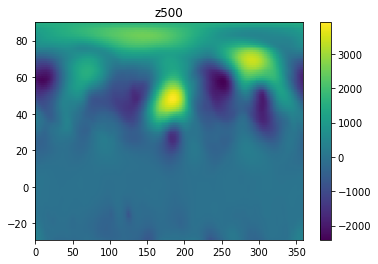

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  # This is added back by InteractiveShellApp.init_path()


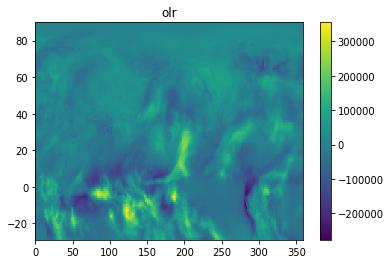

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  # This is added back by InteractiveShellApp.init_path()


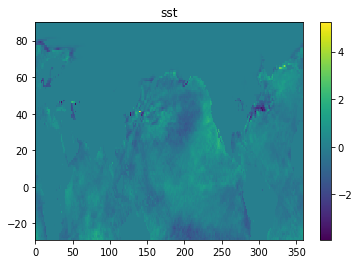

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  # This is added back by InteractiveShellApp.init_path()


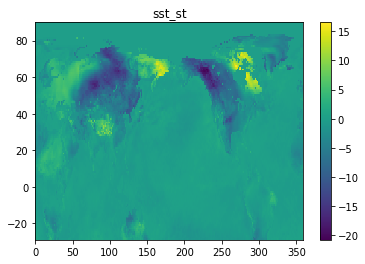

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  # This is added back by InteractiveShellApp.init_path()


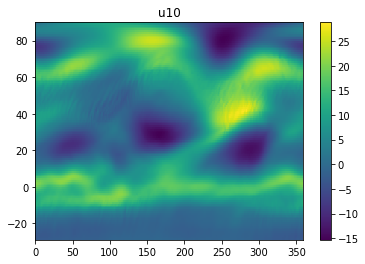

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  # This is added back by InteractiveShellApp.init_path()


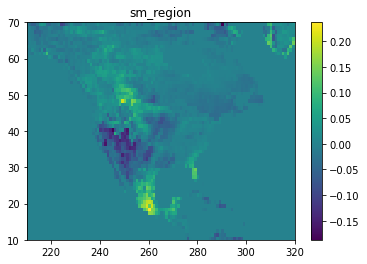

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  # This is added back by InteractiveShellApp.init_path()


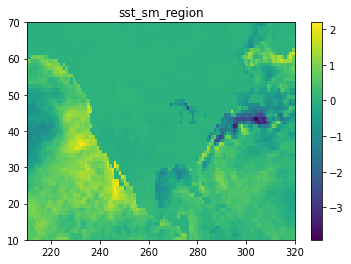

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  # This is added back by InteractiveShellApp.init_path()


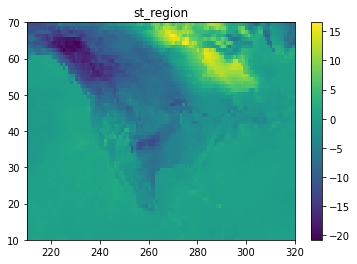

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  # This is added back by InteractiveShellApp.init_path()


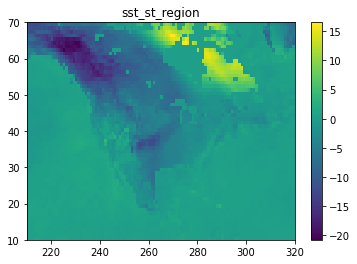

In [4]:
dic_vars = {}
for var_short, variable in zip(name_var,variables):
    path_w_anoms = '/glade/work/jhayron/Weather_Regimes/weekly_anomalies/'
    week1_anoms = xr.open_dataset(f'{path_w_anoms}week1_{variable}_anoms_v2.nc')
    # week1_anoms = week1_anoms.sel(time=df_wr_2.index)
    if variable=='z500':
        week1_anoms = week1_anoms.where(week1_anoms.lat>-30,drop=True)
    # week1_anoms = week1_anoms.sel(time=df_wr.index)
    week1_anoms = week1_anoms.sel(time=df_wr_2.index)
    dic_vars[variable] = week1_anoms
    plt.pcolormesh(week1_anoms.lon,week1_anoms.lat,week1_anoms[f'{var_short}_anomalies'].values[0])
    plt.colorbar()
    plt.title(variable)
    plt.show()
    plt.close('all')

# Build model

In [5]:
import keras
from keras.models import Sequential,Model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, AveragePooling2D
from keras.utils import to_categorical
from keras.layers import LeakyReLU
from keras.layers import ReLU
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
# import visualkeras
# import tensorflow as tf

# ## GLOBAL SEED ##    
# np.random.seed(42)
# tf.random.set_seed(42)

In [9]:
def scale_x(dataset,var_short):
    # # Scale by min-max
    Min = dataset[f'{var_short}_anomalies'].min(dim='time')
    Max = dataset[f'{var_short}_anomalies'].max(dim='time')
    scaled_x = (dataset[f'{var_short}_anomalies']) / (Max - Min)
    return scaled_x

# Test

In [23]:
week = 'week2'

#### ORGANIZE DATA ####
week_output_wr = df_wr_2[week].values.astype(int)
# Make Y categorical
serie_wr_categorical = to_categorical(week_output_wr,num_classes=4)
indices = np.arange(len(serie_wr_categorical))
indices_train = np.where(df_wr_2.week2.index.year<=2001)[0]
indices_val = np.where((df_wr_2.week2.index.year>2001)&(df_wr_2.week2.index.year<=2010))[0]
indices_test = np.where(df_wr_2.week2.index.year>2010)[0]

dic_inputs = {}
dic_train = {}
dic_val = {}
dic_test = {}

for variable,var_short in zip(['sst_st','sst_sm_region'],['sst','sm']):
    dic_inputs[variable] = copy.deepcopy(dic_vars[variable])
    dic_inputs[variable] = scale_x(dic_inputs[variable],var_short)
    dic_inputs[variable] = dic_inputs[variable].data.reshape(-1, \
        dic_inputs[variable].shape[1],dic_inputs[variable].shape[2], 1)

    dic_train[variable] = dic_inputs[variable][indices_train]
    dic_val[variable] = dic_inputs[variable][indices_val]
    dic_test[variable] = dic_inputs[variable][indices_test]
    
wr_persistence = df_wr_2.week1.values.astype(int)[indices_test]
serie_wr_persistence_categorical = to_categorical(wr_persistence)

# Train

In [126]:
keras.backend.clear_session()

In [ ]:
input1 = keras.layers.Input(shape = dic_train['sst_st'].shape[1:])

In [ ]:
input1 = keras.layers.Input(shape = dic_train['sst_st'].shape[1:])
activation_conv = ReLU()
ks = 2
num_classes = 4

conv1 = Conv2D(64, kernel_size=(ks, ks),activation=activation_conv,
        input_shape=dic_train['sst_st'].shape[1:],padding='same')
conv2 = Conv2D(128, (ks, ks), activation=activation_conv,padding='same')
conv3 = Conv2D(256, (ks, ks), activation=activation_conv,padding='same')
avg = AveragePooling2D((ks, ks),padding='same')
flatten = Flatten()
# dense = Dense(256, activation=activation_conv)
dense = Dense(num_classes, activation='softmax')

x = conv1(input1)
x = avg(x)
x = conv2(x)
x = avg(x)
x = conv3(x)
x = avg(x)
x = flatten(x)
output1 = dense(x)

model1 = keras.Model(inputs=input1, outputs=output1, name="branch1")

In [ ]:
input2 = keras.layers.Input(shape = dic_train['sst_sm_region'].shape[1:])
activation_conv = ReLU()
ks = 2
num_classes = 4

conv1 = Conv2D(64, kernel_size=(ks, ks),activation=activation_conv,
        input_shape=dic_train['sst_st'].shape[1:],padding='same')
conv2 = Conv2D(128, (ks, ks), activation=activation_conv,padding='same')
conv3 = Conv2D(256, (ks, ks), activation=activation_conv,padding='same')
avg = AveragePooling2D((ks, ks),padding='same')
flatten = Flatten()
# dense = Dense(256, activation=activation_conv)
dense = Dense(num_classes, activation='softmax')

x = conv1(input2)
x = avg(x)
x = conv2(x)
x = avg(x)
x = conv3(x)
x = avg(x)
x = flatten(x)
output2 = dense(x)

model2 = keras.Model(inputs=input2, outputs=output2, name="branch2")

In [ ]:
keras.utils.plot_model(model1, show_shapes=True)

In [ ]:
keras.utils.plot_model(model2, show_shapes=True)

In [ ]:
merged = keras.layers.Concatenate(axis=1)([input1, input2])
dense = Dense(num_classes, activation='softmax')
out = dense(merged)
model = keras.Model(
    [input1, input2],
    out)

In [ ]:
def create_branch(input_keras):
    activation_conv = ReLU()

In [6]:
def create_model(activation_conv = ReLU()):
    num_classes = 4
    # alpha=0.01
    ks = 2

    model = Sequential()
    model.add(Conv2D(64, kernel_size=(ks, ks),activation=activation_conv,
        input_shape=X_train.shape[1:],padding='same'))
    model.add(AveragePooling2D((ks, ks),padding='same'))
    
    model.add(Conv2D(128, (ks, ks), activation=activation_conv,padding='same'))
    model.add(AveragePooling2D(pool_size=(ks, ks),padding='same'))
    
    model.add(Conv2D(256, (ks, ks), activation=activation_conv,padding='same'))
    model.add(AveragePooling2D(pool_size=(ks, ks),padding='same'))
    
    # model.add(Conv2D(128, (ks, ks), activation=activation_conv,padding='same'))
    # model.add(AveragePooling2D(pool_size=(ks, ks),padding='same'))
    
    model.add(Flatten())
    model.add(Dense(256, activation=activation_conv))                
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy, 
        optimizer=keras.optimizers.Adam(lr=0.00001),metrics=['accuracy'])
    return model


In [7]:
path_models = '/glade/work/jhayron/Weather_Regimes/models/CNN/weights_variables/'

In [8]:
dic_metrics = {}

for var_short, variable in zip(name_var,variables):
    print('********************************************************************************************')
    print(variable)
    print('********************************************************************************************')
    loss_weeks_model = []
    loss_weeks_persistence = []
    acc_weeks_model = []
    acc_weeks_persistence = []

    for week in ['week2','week3','week4','week5','week6']:
        print(week)
        #### ORGANIZE DATA ####
        week_output_wr = df_wr_2[week].values.astype(int)
        # Make Y categorical
        serie_wr_categorical = to_categorical(week_output_wr,num_classes=4)
        
        week1_anoms = copy.deepcopy(dic_vars[variable])
        
        # # Scale by min-max
        Min = week1_anoms[f'{var_short}_anomalies'].min(dim='time')
        Max = week1_anoms[f'{var_short}_anomalies'].max(dim='time')
        scaled_x = (week1_anoms[f'{var_short}_anomalies']) / (Max - Min)

        indices = np.arange(len(serie_wr_categorical))
        #Reshape X
        scaled_x = scaled_x.data.reshape(-1, scaled_x.shape[1],scaled_x.shape[2], 1)

        indices_train = np.where(df_wr_2.week2.index.year<=2001)[0]
        indices_val = np.where((df_wr_2.week2.index.year>2001)&(df_wr_2.week2.index.year<=2010))[0]
        indices_test = np.where(df_wr_2.week2.index.year>2010)[0]

        X_test = scaled_x[indices_test]
        y_test = serie_wr_categorical[indices_test]

        X_train = scaled_x[indices_train]
        y_train = serie_wr_categorical[indices_train]

        X_val = scaled_x[indices_val]
        y_val = serie_wr_categorical[indices_val]

        wr_persistence = df_wr_2.week1.values.astype(int)[indices_test]
        serie_wr_persistence_categorical = to_categorical(wr_persistence)

        #### TRAIN ####

        keras.backend.clear_session()
        model = create_model()
        batch_size = 128
        epochs = 200

        earlystop = EarlyStopping(monitor='val_loss', patience=5)
        try:
            os.mkdir(f'{path_models}{variable}')
        except: pass
        filepath = f'{path_models}{variable}/model_{week}_v2.h5'
        checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, 
                                     mode='auto',save_weights_only=False)
        model.fit(X_train, y_train, batch_size=batch_size,\
            epochs=epochs,verbose=0,validation_data=(X_val, y_val), callbacks=[checkpoint,earlystop])

        #### EVAL ####

        model.load_weights(filepath)
        model.save(filepath)
        metrics_model = model.evaluate(x=X_test,y=y_test)
        acc_temp = metrics_model[1]
        loss_temp = metrics_model[0]
        acc_persistence = accuracy_score(y_test,serie_wr_persistence_categorical)
        loss_persistence = log_loss(y_test,serie_wr_persistence_categorical)
        print('loss/acc model')
        print(metrics_model)
        print('loss/acc persistence')
        print([loss_persistence,acc_persistence])

        loss_weeks_model.append(loss_temp)
        loss_weeks_persistence.append(loss_persistence)
        acc_weeks_model.append(acc_temp)
        acc_weeks_persistence.append(acc_persistence)
        
    ### PLOT BARS ###
    plt.bar(np.arange(5),acc_weeks_model,width=-0.3,align='edge',label=f'CNN - {variable.upper()}',color='k')
    plt.bar(np.arange(5),acc_weeks_persistence,width=0.3,align='edge',label='Persistence',color='darkorange')
    plt.legend()
    plt.ylabel('Percentage of accurate predictions [%]\nTesting Sample (15%)')
    plt.xticks(np.arange(5),['Week 2','Week 3','Week 4','Week 5','Week 6'])
    plt.xlabel('Lead time')
    path_figures = '/glade/u/home/jhayron/WeatherRegimes/Figures/Variables/'
    plt.savefig(f'{path_figures}{variable}_SvP.png',bbox_inches='tight')
    plt.close('all')
    
    ### SAVE METRICS ###
    
    df_metrics = pd.DataFrame(np.array([acc_weeks_model,acc_weeks_persistence,loss_weeks_model,loss_weeks_persistence]).T,
            columns = ['acc_model','acc_persistence','loss_model','loss_persistence'])
    dic_metrics[variable] = df_metrics
    

********************************************************************************************
z500
********************************************************************************************
week2
18/18 [==============================] - 0s 27ms/step - loss: 1.1759 - accuracy: 0.4831
loss/acc model
[1.175899863243103, 0.48306596279144287]
loss/acc persistence
[19.45499704398361, 0.43672014260249553]
week3
18/18 [==============================] - 0s 20ms/step - loss: 1.3456 - accuracy: 0.3440
loss/acc model
[1.3455754518508911, 0.3440285325050354]
loss/acc persistence
[25.365375892788755, 0.26559714795008915]
week4
18/18 [==============================] - 0s 19ms/step - loss: 1.3472 - accuracy: 0.3280
loss/acc model
[1.3472063541412354, 0.3279857337474823]
loss/acc persistence
[25.119110107421875, 0.2727272727272727]
week5
18/18 [==============================] - 0s 20ms/step - loss: 1.3721 - accuracy: 0.3191
loss/acc model
[1.3721050024032593, 0.3190730810165405]
loss/acc persistence
[

In [ ]:
# variables = ['z500','olr', 'sst', 'sst_st', 'u10', 'sm_region','sst_sm_region', 
#              'st_region','sst_st_region']

In [66]:
variables = ['z500','olr', 'sst', 'u10', 'sm_region','st_region']

In [67]:
colors = ['royalblue','blueviolet','red','gold',
         'limegreen','coral']

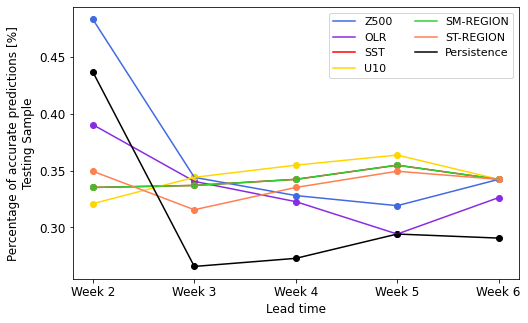

In [68]:
plt.figure(figsize=(8,5))
for i in range(len(variables)):
    plt.plot(np.arange(5),dic_metrics[variables[i]].acc_model, color=colors[i],
             label=variables[i].upper().replace('_','-'))
    plt.scatter(np.arange(5),dic_metrics[variables[i]].acc_model,color=colors[i])
plt.plot(np.arange(5),dic_metrics[variable].acc_persistence,label='Persistence',color='k')
plt.scatter(np.arange(5),dic_metrics[variable].acc_persistence,color='k')
plt.legend(ncol=2,fontsize=11)
plt.ylabel('Percentage of accurate predictions [%]\nTesting Sample',fontsize=12)
plt.xticks(np.arange(5),['Week 2','Week 3','Week 4','Week 5','Week 6'],fontsize=12)
plt.xlabel('Lead time',fontsize=12)
plt.yticks(fontsize=12)
path_figures = '/glade/u/home/jhayron/WeatherRegimes/Figures/'
plt.savefig(f'{path_figures}Accuracy_CNN_Variables.png',bbox_inches='tight')

In [69]:
variables = ['z500','olr', 'sst_st', 'u10', 'sst_sm_region', 
             'sst_st_region']

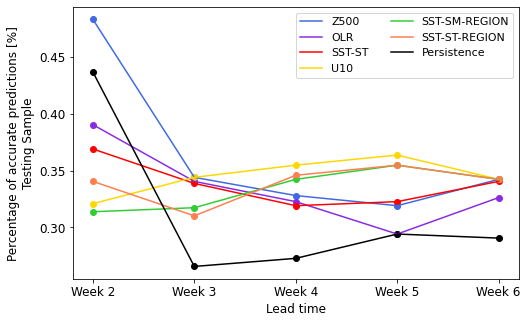

In [70]:
plt.figure(figsize=(8,5))
for i in range(len(variables)):
    plt.plot(np.arange(5),dic_metrics[variables[i]].acc_model, color=colors[i],
             label=variables[i].upper().replace('_','-'))
    plt.scatter(np.arange(5),dic_metrics[variables[i]].acc_model,color=colors[i])
plt.plot(np.arange(5),dic_metrics[variable].acc_persistence,label='Persistence',color='k')
plt.scatter(np.arange(5),dic_metrics[variable].acc_persistence,color='k')
plt.legend(ncol=2,fontsize=11)
plt.ylabel('Percentage of accurate predictions [%]\nTesting Sample',fontsize=12)
plt.xticks(np.arange(5),['Week 2','Week 3','Week 4','Week 5','Week 6'],fontsize=12)
plt.xlabel('Lead time',fontsize=12)
plt.yticks(fontsize=12)
path_figures = '/glade/u/home/jhayron/WeatherRegimes/Figures/'
plt.savefig(f'{path_figures}Accuracy_CNN_Variables_Mixed.png',bbox_inches='tight')


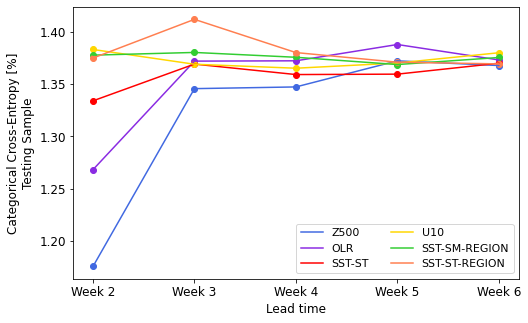

In [72]:
plt.figure(figsize=(8,5))
for i in range(len(variables)):
    plt.plot(np.arange(5),dic_metrics[variables[i]].loss_model, color=colors[i],
             label=variables[i].upper().replace('_','-'))
    plt.scatter(np.arange(5),dic_metrics[variables[i]].loss_model,color=colors[i])
# plt.plot(np.arange(5),dic_metrics[variable].loss_persistence,label='Persistence',color='k')
# plt.scatter(np.arange(5),dic_metrics[variable].loss_persistence,color='k')
plt.legend(ncol=2,fontsize=11)
plt.ylabel('Categorical Cross-Entropy [%]\nTesting Sample',fontsize=12)
plt.xticks(np.arange(5),['Week 2','Week 3','Week 4','Week 5','Week 6'],fontsize=12)
plt.xlabel('Lead time',fontsize=12)
plt.yticks(fontsize=12)
path_figures = '/glade/u/home/jhayron/WeatherRegimes/Figures/'
plt.savefig(f'{path_figures}Loss_CNN_Variables_Mixed.png',bbox_inches='tight')


In [51]:
np.save('/glade/work/jhayron/Weather_Regimes/models/CNN/metrics/dic_metrics',dic_metrics)